In [127]:
import random, math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [133]:
vx = np.array([(0), (0)])
vx
vx[0,:].append

1

In [256]:
def gillespie(r=1.0):
    x = 0
    y = 0
    time = 0

    vx = [np.zeros(1), np.zeros(1)]
    vy = [np.zeros(1), np.zeros(1)]
    
    fig, ax = plt.subplots(figsize=(20,5))

    while time < r*500:
        # Compute propensities
        prop = [1, 2*x/r, 0.02*x**2*y/r**3, 0.04*x/r]
        tot_prop = sum(prop)

        # Calculate timestep
        time += -1/tot_prop*math.log(1 - random.random())

        # Choose reaction
        rnum = random.random()
        if rnum < prop[0]/tot_prop:
            x += 1
            vx[0] = np.append(vx[0],time)
            vx[1] = np.append(vx[1],x)
        elif rnum < (prop[0]+prop[1])/tot_prop:
            x -= 1
            y += 1
            vx[0] = np.append(vx[0],time)
            vx[1] = np.append(vx[1],x)
            vy[0] = np.append(vy[0],time)
            vy[1] = np.append(vy[1],y)
        elif rnum < (prop[0]+prop[1]+prop[2])/tot_prop:
            x += 1
            y -= 1
            vx[0] = np.append(vx[0],time)
            vx[1] = np.append(vx[1],x)
            vy[0] = np.append(vy[0],time)
            vy[1] = np.append(vy[1],y)
        else:
            x -= 1
            vx[0] = np.append(vx[0],time)
            vx[1] = np.append(vx[1],x)

    ax.plot(vx[0], r*vx[1], label = 'x')
    ax.plot(vy[0], r*vy[1], label = 'y')
    ax.legend()

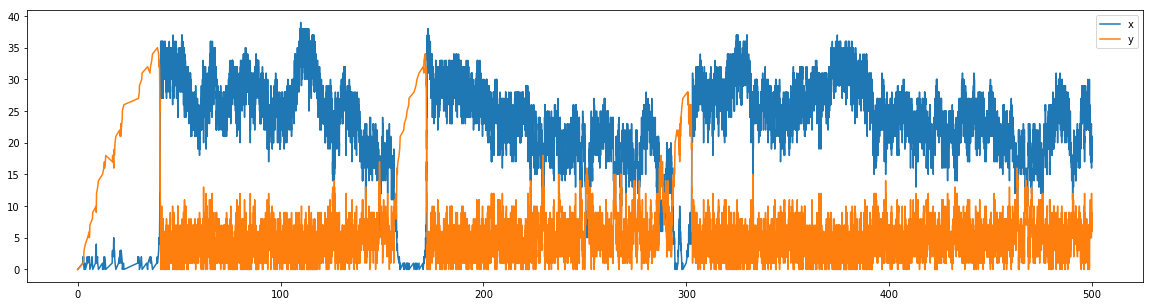

In [257]:
gillespie()

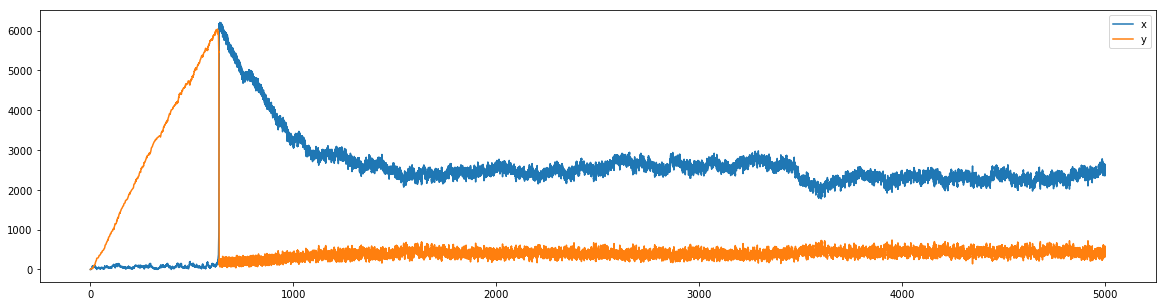

In [258]:
gillespie(10.0)